# 1. 데이터 가져오기

In [2]:
!mkdir -p ~/aiffel/bike-sharing-demand/train.csv
import pandas as pd

In [3]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [4]:
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성

In [5]:
train['datetime']=pd.to_datetime(train['datetime'])

In [6]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['min']=train['datetime'].dt.minute
train['sec']=train['datetime'].dt.second

In [7]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


# 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

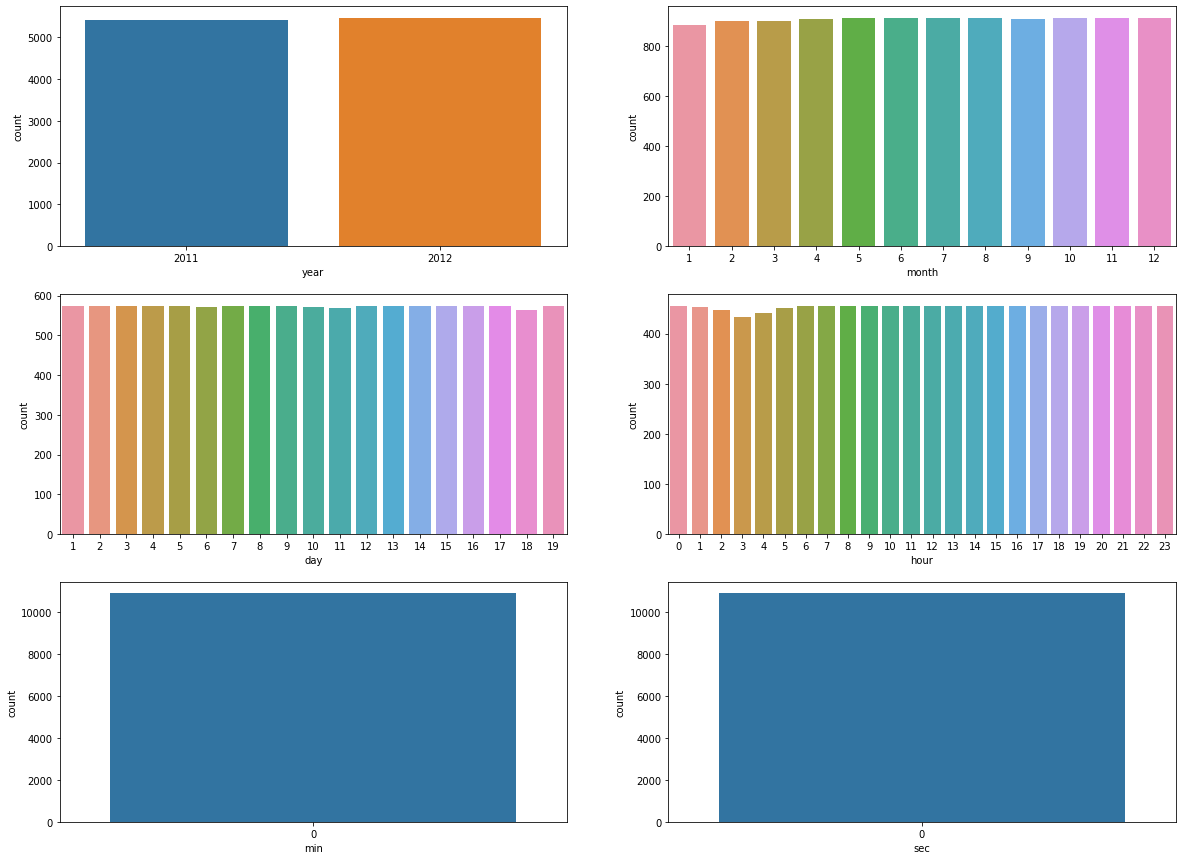

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
sns.countplot(x=train['year'], data=train,ax=axes[0, 0])
sns.countplot(x='month', data=train,ax=axes[0, 1])
sns.countplot(x='day', data=train,ax=axes[1, 0])
sns.countplot(x='hour', data=train,ax=axes[1, 1])
sns.countplot(x='min', data=train,ax=axes[2, 0])
sns.countplot(x='sec', data=train,ax=axes[2, 1])
plt.show()

# 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [10]:
X = train[['season', 'holiday', 'workingday', 'weather','temp', 'atemp','humidity','windspeed','year','month','day']].values

In [11]:
y = train['count'].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 11) (8708,)
(2178, 11) (2178,)


# 5. LinearRegression 모델 학습

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [16]:
predictions = model.predict(X_test)
predictions

array([260.4239056 ,  76.93576534, 152.41030381, ..., 302.91736933,
        55.68260063, 239.67976676])

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("mse: ", mse)
RMSE = mse**0.5
print("RMSE :" ,RMSE)

mse:  22248.745969933036
RMSE : 149.1601353241979


# 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

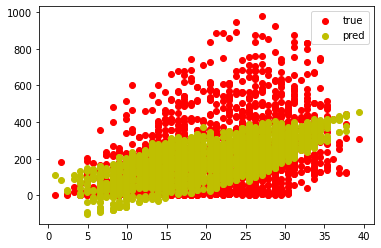

In [18]:
# temp 시각화
plt.scatter(X_test[:,4], y_test, label = "true", c = 'r')
plt.scatter(X_test[:,4], predictions,label = "pred", c ='y')
plt.legend()
plt.show()

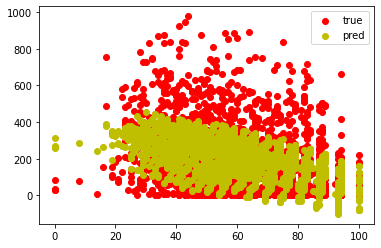

In [19]:
# humidity 시각화
plt.scatter(X_test[:,6], y_test, label = "true", c = 'r')
plt.scatter(X_test[:,6], predictions,label = "pred", c ='y')
plt.legend()
plt.show()

# 회고

- 어려웠던점 : seaborn의 countplot을 사용하고, subplot으로 6개의 그래프를 표현 하는 점이 어려웠다.   
- 알아낸점 : 당뇨병 수치에서 어떤 데이터를 버리고 모델을 예측하여 MSE 손실함수값을 봤을때 3000이하가 안나오는 점이 신기했고, S1, S2, S3, S4, S5, S6에 대해서 더 자세히 알아봐야겠다고 생각했다.  
- 시도한 점: 루브릭에서 MSE 손실함수값 3000이하를 달성하기위해 처음에 모든 데이터를 사용했을때가 맞는 정답이다고 생각했고, 자전거 프로젝트에서는 6개의 그래프를 모두 시각화를 위해 subplot에 대해 더 찾아보았다.  
- 느낀점 : 이번 노드에서 시각화에대해 더 잘 알게 되었고 회귀모델을 직접 구현하는 것과 이미 사이킷런에 있는 linearRegression모델을 사용하여 두 경우를 비교해 보고 싶다는 생각을 그루분들이랑 얘기했었는데, 직접 구현한 회귀모델은 random값이 다르기 때문에 예측정확도가 좀 다를거라고 생각이 들었다.